In [ ]:
import re
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

!pip install datasets
from datasets import load_dataset

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense, SimpleRNN, Embedding, LSTM, Dropout

warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
dataset = load_dataset("winvoker/turkish-sentiment-analysis-dataset")
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/440679 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/48965 [00:00<?, ? examples/s]

In [ ]:
df_train

,text,label,dataset
0,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,Positive,urun_yorumlari
1,"ürünlerden çok memnunum, kesinlikle herkese ta...",Positive,urun_yorumlari
2,"hızlı kargo, temiz alışveriş.teşekkür ederim.",Positive,urun_yorumlari
3,Çünkü aranan tapınak bu bölgededir .,Notr,wiki
4,bu telefonu başlıca alma nedenlerim ise elimde...,Positive,urun_yorumlari
...,...,...,...
440674,Ayrıca burç yorumları ve çapraz bulmaca da der...,Notr,wiki
440675,günümüz de ssd olmazsa olmaz bir donanım artık...,Positive,urun_yorumlari
440676,kullandım ve çok memnun kaldım. ocak başında d...,Positive,urun_yorumlari
440677,Adını Lenkeran şehrinden almıştır .,Notr,wiki


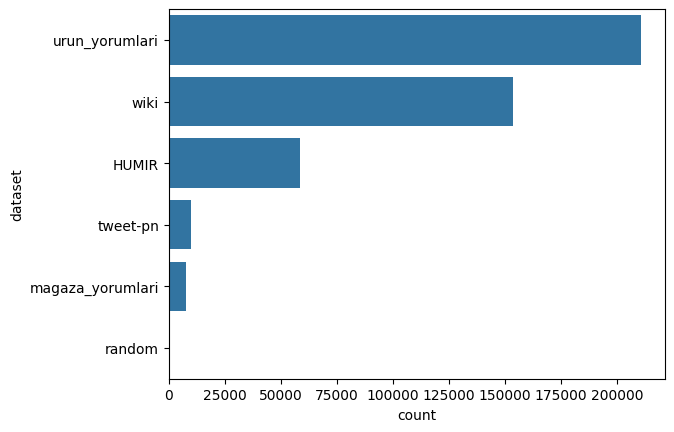

In [ ]:
sns.countplot(df_train.dataset);

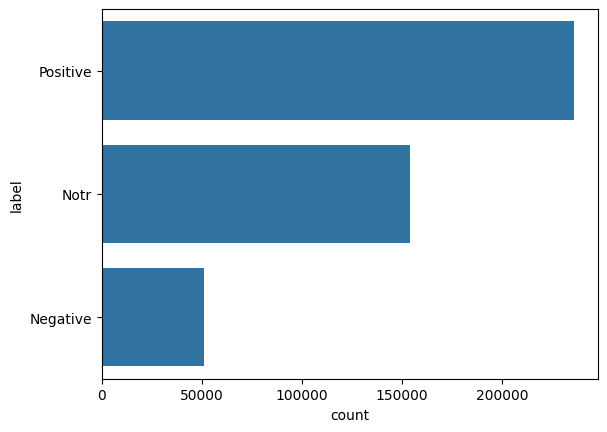

In [ ]:
sns.countplot(df_train.label);

In [ ]:
df_train = df_train[df_train.label!="Notr"] # To remove neutral responses
df_test = df_test[df_test.label!="Notr"] # To remove neutral responses

In [ ]:
df_train.head(10) # Quick Look

,text,label,dataset
0,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,Positive,urun_yorumlari
1,"ürünlerden çok memnunum, kesinlikle herkese ta...",Positive,urun_yorumlari
2,"hızlı kargo, temiz alışveriş.teşekkür ederim.",Positive,urun_yorumlari
4,bu telefonu başlıca alma nedenlerim ise elimde...,Positive,urun_yorumlari
5,telefon gayet güzel ben kırmızı aldım baya şık...,Positive,urun_yorumlari
7,harika bir kokusu var ve tüm odayı sarıyor..,Positive,urun_yorumlari
8,ürün orjinal ve gerçekten fiyat performans ürü...,Positive,urun_yorumlari
9,Zaten filmde Şener Şen olması ve Türkiyenin g...,Positive,HUMIR
10,su calathes denen orospu cocugunu durdurun,Negative,tweet-pn
11,"çok araştırma yaptım, işim dolayısıyla gerçekt...",Positive,urun_yorumlari


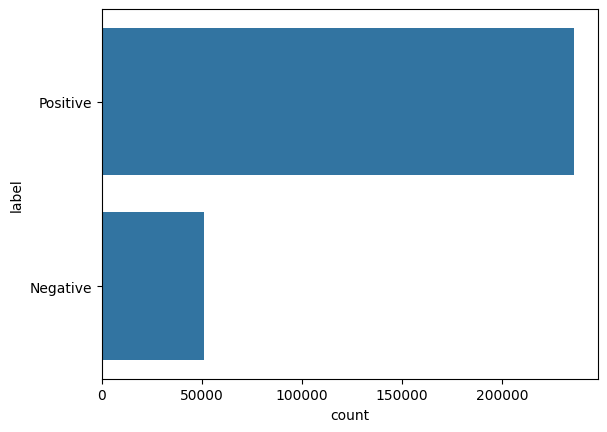

In [ ]:
sns.countplot(df_train.label);

In [ ]:
df_train_balanced = pd.concat([df_train[df_train.label == "Positive"].sample(n=50000, random_state=42), df_train[df_train.label == "Negative"].sample(n=50000, random_state=42)]).sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
#sns.countplot(df_train_balanced.label);

In [ ]:
X_train = df_train_balanced["text"]
Y_train = df_train_balanced["label"]

X_test = df_test["text"]
Y_test = df_test["label"]

In [ ]:
max_features = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
encoder = LabelEncoder()
Y_train_enc = encoder.fit_transform(Y_train)
Y_test_enc = encoder.transform(Y_test)

In [ ]:
regressor = Sequential()
regressor.add(Embedding(input_dim=max_features, output_dim=100, input_length=max_len))
regressor.add(LSTM(128))
regressor.add(Dropout(0.5))
regressor.add(Dense(1, activation='sigmoid'))

In [ ]:
regressor.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
regressor.fit(X_train_pad, Y_train_enc, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2500/2500 [==============================] - 430s 171ms/step - loss: 0.3114 - accuracy: 0.8665 - val_loss: 0.2731 - val_accuracy: 0.8836
Epoch 2/10
2500/2500 [==============================] - 414s 166ms/step - loss: 0.2477 - accuracy: 0.8975 - val_loss: 0.2728 - val_accuracy: 0.8865
Epoch 3/10
2500/2500 [==============================] - 410s 164ms/step - loss: 0.2149 - accuracy: 0.9129 - val_loss: 0.2703 - val_accuracy: 0.8892
Epoch 4/10
2500/2500 [==============================] - 409s 164ms/step - loss: 0.1888 - accuracy: 0.9247 - val_loss: 0.3169 - val_accuracy: 0.8834
Epoch 5/10
2500/2500 [==============================] - 412s 165ms/step - loss: 0.1638 - accuracy: 0.9358 - val_loss: 0.3180 - val_accuracy: 0.8795
Epoch 6/10
2500/2500 [==============================] - 413s 165ms/step - loss: 0.1418 - accuracy: 0.9449 - val_loss: 0.3476 - val_accuracy: 0.8809
Epoch 7/10
2500/2500 [==============================] - 412s 165ms/step - loss: 0.1207 - accuracy: 0.9534 - val_

In [ ]:
# Save the model
regressor.save('sentiment_lstm_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the saved model
regressor = load_model('sentiment_lstm_model (1).hdf5')

In [ ]:
y_train_pred = (regressor.predict(X_train_pad) > 0.5).astype("int32")
y_test_pred = (regressor.predict(X_test_pad) > 0.5).astype("int32")

train_acc = accuracy_score(Y_train_enc, y_train_pred)
test_acc = accuracy_score(Y_test_enc, y_test_pred)

train_pre = precision_score(Y_train_enc, y_train_pred)
test_pre = precision_score(Y_test_enc, y_test_pred)

train_rec = recall_score(Y_train_enc, y_train_pred)
test_rec = recall_score(Y_test_enc, y_test_pred)

train_f1 = f1_score(Y_train_enc, y_train_pred)
test_f1 = f1_score(Y_test_enc, y_test_pred)

print(f'Train Accuracy: {train_acc:.2f}')
print(f'Test Accuracy: {test_acc:.2f}')

997/997 [==============================] - 50s 50ms/step
Train Accuracy: 0.96
Test Accuracy: 0.88


In [ ]:
print(f'Train Precision: {train_pre:.2f}')
print(f'Test Precision: {test_pre:.2f}\n')

print(f'Train Recall: {train_rec:.2f}')
print(f'Test Recall: {test_rec:.2f}\n')

print(f'Train F1: {train_f1:.2f}')
print(f'Test F1: {test_f1:.2f}')

Train Precision: 0.96
Test Precision: 0.97

Train Recall: 0.96
Test Recall: 0.87

Train F1: 0.96
Test F1: 0.92


In [ ]:
user_input = input("Please enter a text to analyze sentiment: ")

sequences = tokenizer.texts_to_sequences([user_input])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

prediction = regressor.predict(padded_sequences)
sentiment = 'Positive' if prediction > 0.5 else 'Negative'

print(f"\nThe sentiment of the text: {sentiment}")
print(f"Confidence: {float(prediction):.4f}\n")

Please enter a text to analyze sentiment: kargo çok hızlı geldi
1/1 [==============================] - 0s 27ms/step

The sentiment of the text: Positive
Confidence: 0.8335



<ipython-input-20-e464601a3f01>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Confidence: {float(prediction):.4f}\n")


In [ ]:
# dataset = load_dataset("LocalDoc/sentiments_dataset_azerbaijani")